In [52]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(hrbrthemes)))
suppressWarnings(suppressMessages(library(forcats)))
suppressWarnings(suppressMessages(library(glue)))
suppressWarnings(suppressMessages(library(viridis)))
suppressWarnings(suppressMessages(library(ggdendro)))
suppressWarnings(suppressMessages(library(grid)))
suppressWarnings(suppressMessages(library(colorspace)))
suppressWarnings(suppressMessages(library(cowplot)))
suppressWarnings(suppressMessages(library(ComplexHeatmap)))
library("latex2exp")
suppressWarnings(suppressMessages(library(gridExtra)))
library(broom)
suppressWarnings(suppressMessages(library(tidyverse)))
options(repr.plot.width=6, repr.plot.height=6)
library(plotrix)
library("png")
library("raster")
library('emdist')
library('topicmodels')
library(transport)
library('umap')

Warning message:
"failed creating initial embedding; using random embedding instead"


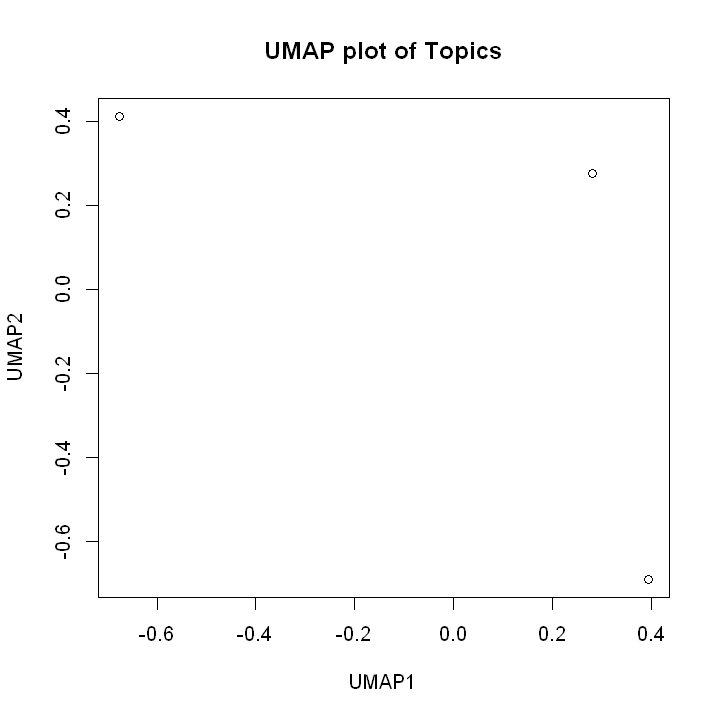

In [91]:
# Run UMAP
umap_result <- umap(t(matrix_data),n_neighbors = 2)

# Extract the layout (2D coordinates)
layout <- umap_result$layout

# Plot the layout
plot(layout, xlab = "UMAP1", ylab = "UMAP2", main = "UMAP plot of Topics")


In [92]:
layout

canavanine,0.2816379,0.2767208
heat,0.3942734,-0.6887499
oxidative.peroxide,-0.6759113,0.4120291


In [68]:
layout

canavanine,0.2816379,0.2767208
heat,0.3942734,-0.6887499
oxidative.peroxide,-0.6759113,0.4120291


In [ ]:
# Read Wild-type Inference File
# Select only canavanine,heat,oxidative.peroxide posteriors 
# Add column of maximum posterior for filtration purposes

In [93]:
wt_r <- read.csv("DCLPB_peter_UC_processed__inference_oak_1.csv",skip=1,header=TRUE)%>%
dplyr::select(canavanine,heat,oxidative.peroxide)%>%rowwise() %>% 
mutate(max_r = max(canavanine,heat,oxidative.peroxide))

In [94]:
# Calculate JSD between canavanine,heat,oxidative.peroxide for components Posterior > 0.05 but also rest of them aggregated through colSums
# Add row and column names to matrix and convert to data frame
# Add diagonal element as NA and zero divergence as NA

In [95]:
matrix_data <- as.matrix(rbind(wt_r%>%filter(max_r>=0.01),colSums(wt_r%>%filter(max_r<0.01)))%>%dplyr::select(-max_r))

In [7]:
wt_JSD <- ks.test(t(as.matrix(rbind(wt_r%>%filter(max_r>=0.05),colSums(wt_r%>%filter(max_r<0.05)))%>%dplyr::select(-max_r))))#%>%
dimnames(wt_JSD) <- list(c("canavanine","heat","oxidative"), c("canavanine","heat","oxidative"))
wt_JSD <- as.data.frame(as.table(wt_JSD))
wt_JSD[wt_JSD == 0] <- NA
wt_JSD <- wt_JSD%>%mutate(Freq=case_when(Var1==Var2 ~ 0,TRUE ~ as.double(Freq)))
wt_JSD$Freq[wt_JSD$Freq == 0] <- NA

ERROR: Error in is.ordered(y): argument "y" is missing, with no default


In [287]:
# Plot the divergences

In [288]:
options(repr.plot.width=8, repr.plot.height=6) 
p1<- ggplot(wt_JSD, aes(Var1,Var2, fill= Freq)) + 
  geom_tile(color="gray")  +
   scale_fill_viridis(discrete = FALSE)  +
  theme_ipsum()+xlab("")+ylab("")+theme_minimal()+
theme(axis.text.x = element_text(size = 18),axis.text.y = element_text(size = 18),plot.title = element_text(size = 18),
     panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ggtitle("Wild-type")+labs(fill='JS Divergence(log2)') +scale_x_discrete(limits = c("canavanine","heat","oxidative"))+scale_y_discrete(limits = c("canavanine","heat","oxidative"))

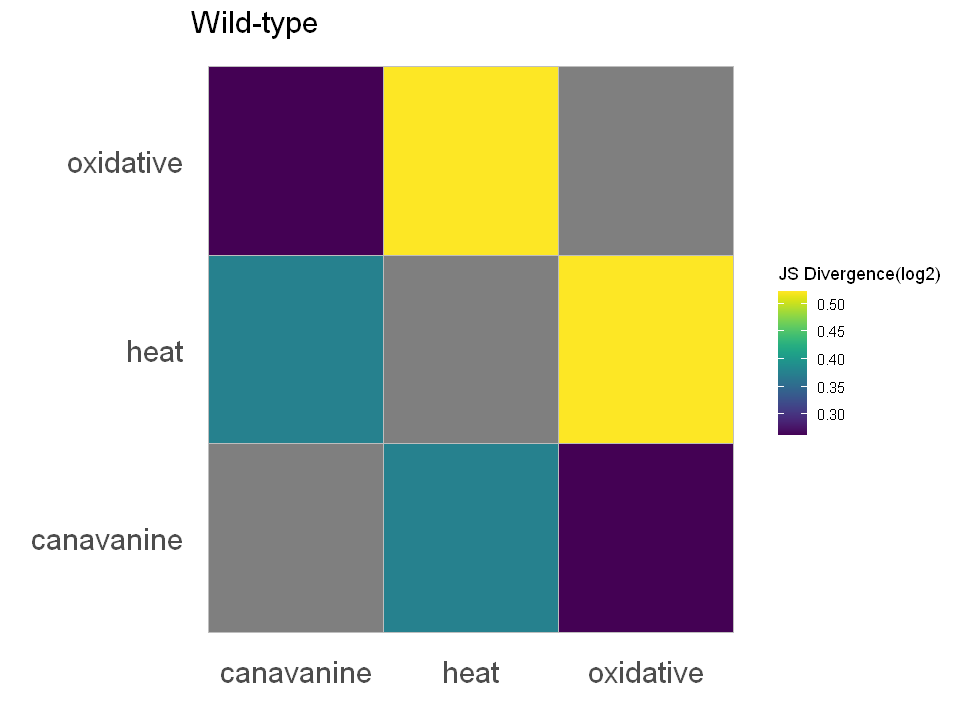

In [289]:
p1

In [290]:
# Print the divergences

In [291]:
wt_JSD

Var1,Var2,Freq
<fct>,<fct>,<dbl>
canavanine,canavanine,NA
heat,canavanine,0.3741584
oxidative,canavanine,0.2613144
canavanine,heat,0.3741584
heat,heat,NA
oxidative,heat,0.5211851
canavanine,oxidative,0.2613144
heat,oxidative,0.5211851
oxidative,oxidative,NA


In [292]:
# DKJ

In [293]:
# Read DKJ Inference File
# Select only canavanine,heat,oxidative.peroxide posteriors 
# Add column of maximum posterior for filtration purposes

In [29]:
dkj_r <- read.csv("DKJ_peter_UC_processed__inference_oak_1.csv",skip=1,header=TRUE)%>%
dplyr::select(canavanine,heat,oxidative.peroxide)%>%rowwise() %>%
mutate(max_r = max(canavanine,heat,oxidative.peroxide))

In [30]:
# Calculate JSD between canavanine,heat,oxidative.peroxide for components Posterior > 0.05 but also rest of them aggregated through colSums
# Add row and column names to matrix and convert to data frame
# Add diagonal element as NA and zero divergence as NA

In [ ]:
dkj_JSD <- JSD(t(as.matrix(rbind(dkj_r%>%filter(max_r>=0.05),colSums(dkj_r%>%filter(max_r<0.05)))%>%dplyr::select(-max_r))))#%>%
dimnames(dkj_JSD) <- list(c("canavanine","heat","oxidative"), c("canavanine","heat","oxidative"))

In [297]:
dkj_JSD <- JSD(t(as.matrix(rbind(dkj_r%>%filter(max_r>=0.05),colSums(dkj_r%>%filter(max_r<0.05)))%>%dplyr::select(-max_r))))#%>%
dimnames(dkj_JSD) <- list(c("canavanine","heat","oxidative"), c("canavanine","heat","oxidative"))
dkj_JSD <- as.data.frame(as.table(dkj_JSD))
dkj_JSD[dkj_JSD == 0] <- NA
dkj_JSD <- dkj_JSD%>%mutate(Freq=case_when(Var1==Var2 ~ 0,TRUE ~ as.double(Freq)))
dkj_JSD$Freq[dkj_JSD$Freq == 0] <- NA

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 3 vectors.



In [298]:
# Plot the divergences

In [299]:
options(repr.plot.width=8, repr.plot.height=6) 
p2 <- ggplot(dkj_JSD, aes(Var1,Var2, fill= Freq)) + 
  geom_tile(color="gray")  +
   scale_fill_viridis(discrete = FALSE)+
  theme_ipsum()+xlab("")+ylab("")+theme_minimal()+
theme(axis.text.x = element_text(size = 18),axis.text.y = element_text(size = 18),plot.title = element_text(size = 18),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ggtitle("dnaKJ-NI")+labs(fill='JS Divergence(log2)') +scale_x_discrete(limits = c("canavanine","heat","oxidative"))+scale_y_discrete(limits = c("canavanine","heat","oxidative"))

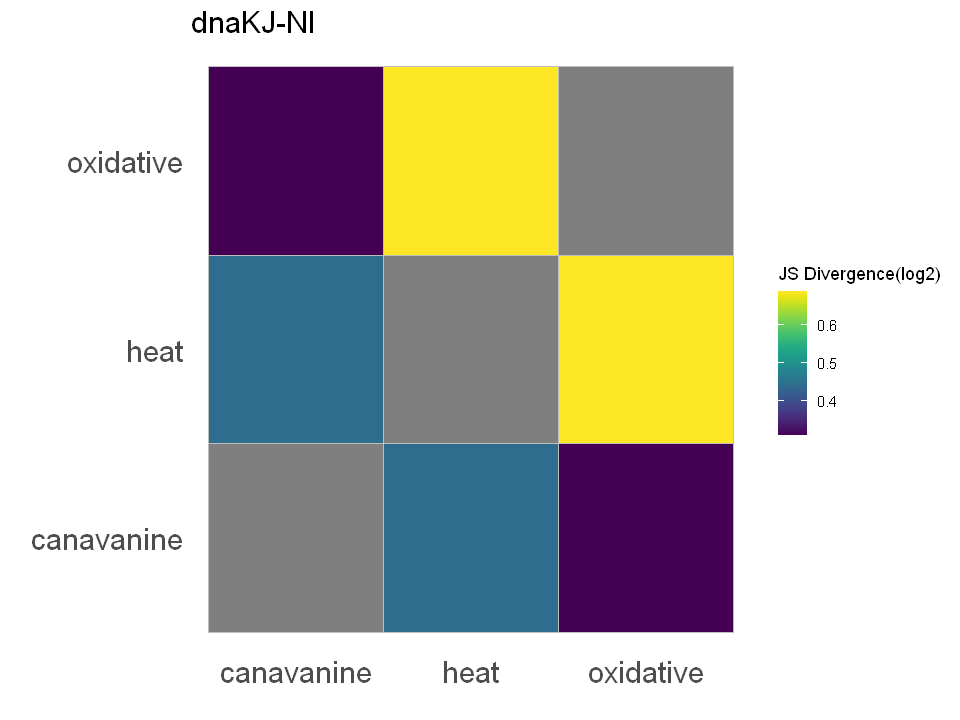

In [300]:
p2

In [301]:
# Print the divergences

In [302]:
dkj_JSD

Var1,Var2,Freq
<fct>,<fct>,<dbl>
canavanine,canavanine,NA
heat,canavanine,0.4428671
oxidative,canavanine,0.3094786
canavanine,heat,0.4428671
heat,heat,NA
oxidative,heat,0.6856851
canavanine,oxidative,0.3094786
heat,oxidative,0.6856851
oxidative,oxidative,NA


In [ ]:
### Read the illustartion figure

In [304]:
p3_1 <- rasterGrob(readPNG(source="Illustration1.png"))
p3_2 <- rasterGrob(readPNG(source="Illustration2.png"))

In [305]:
## Single stress plot for WT

In [306]:
df <- read.table("2023-02-15-wt-medheat-doublestress_auc_data.tsv",header=TRUE)%>%filter(status=="singlestress")%>%filter(condition!="heat_control")

In [307]:
df$condition <- factor(df$condition,levels=unique(df$condition))
df$stress <- factor(df$stress,levels=c("oxidative","canavanine"))
df1s <- df%>%group_by(stress,condition)%>%summarise_at(vars(delta_auc), list(Ind = mean,se=std.error))
colnames(df)[colnames(df) == 'delta_auc'] <- 'ci'

Warning message:
"Duplicated aesthetics after name standardisation: size"


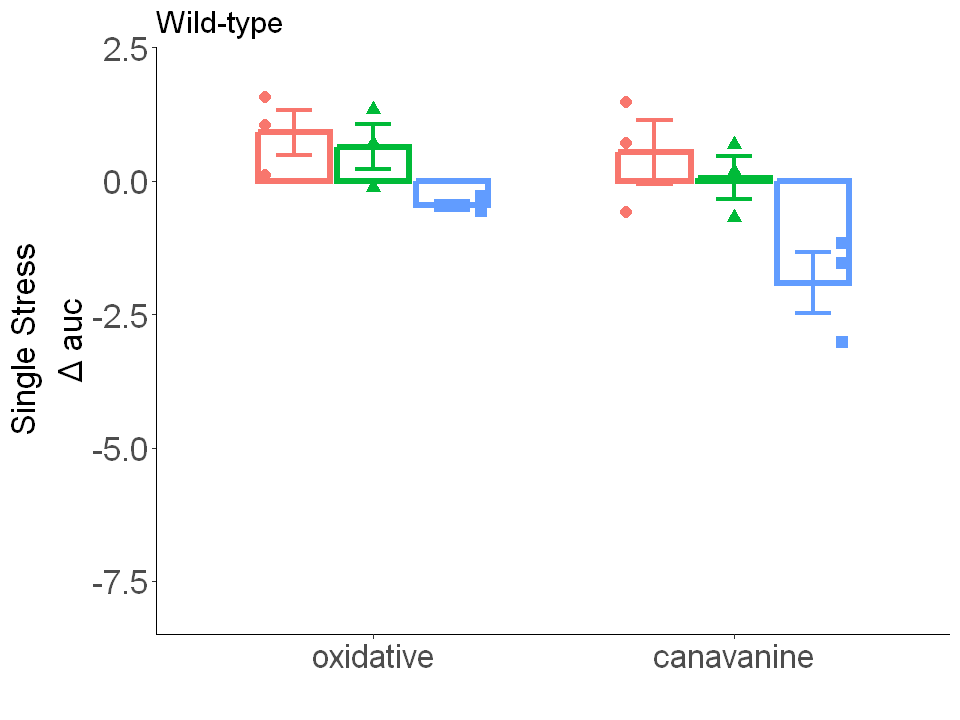

In [313]:
p4 <- ggplot(df1s, aes(x=stress, y=Ind, fill=condition)) + 
  geom_bar(aes(color=condition),fill="white",stat="identity",position=position_dodge(0.66),width=0.6,size=1.9) +
  geom_errorbar(data=df1s,aes(ymin=Ind-se, ymax=Ind+se,color=condition), width=.30,size=1.2,
                 position=position_dodge(.66))+geom_point(data=df, aes(stress, ci, group=condition,color=condition,shape=condition),size=3,position = position_dodge(width = 0.9), size=5, show.legend=FALSE)+  
#scale_y_continuous(breaks = seq(-5, -5, -2.5)) +
labs(title="", x = "")+ylab(expression(atop( paste("Single Stress"),"\u394 auc")))+
   theme_classic() +ggtitle("Wild-type")+theme(legend.position="none")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))+ylim(-8,2)
p4

In [258]:
## Single stress plot for DKJ

In [314]:
df <- read.table("2023-02-16-cpc237-medheat-doublestress_auc_data.tsv",header=TRUE)%>%filter(status=="singlestress")%>%filter(condition!="heat_control")

In [315]:
df$condition <- factor(df$condition,levels=unique(df$condition))
df$stress <- factor(df$stress,levels=c("oxidative","canavanine"))
df1s <- df%>%group_by(stress,condition)%>%summarise_at(vars(delta_auc), list(Ind = mean,se=std.error))
colnames(df)[colnames(df) == 'delta_auc'] <- 'ci'

Warning message:
"Duplicated aesthetics after name standardisation: size"


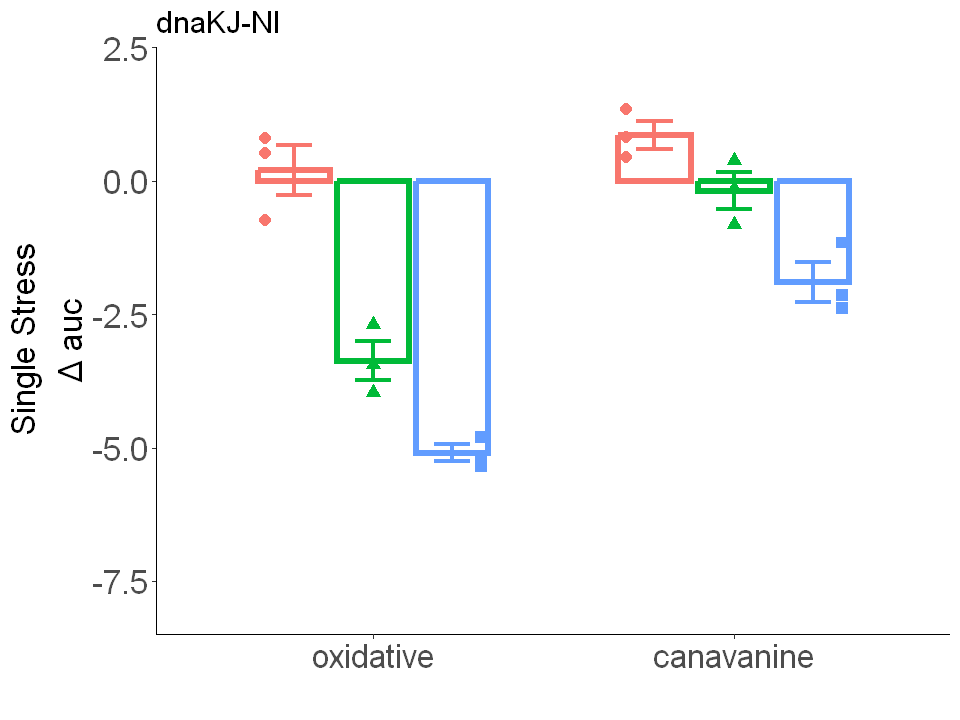

In [316]:
p5 <- ggplot(df1s, aes(x=stress, y=Ind, fill=condition)) + 
  geom_bar(aes(color=condition),fill="white",stat="identity",position=position_dodge(0.66),width=0.6,size=1.9) +
  geom_errorbar(data=df1s,aes(ymin=Ind-se, ymax=Ind+se,color=condition), width=.30,size=1.2,
                 position=position_dodge(.66))+geom_point(data=df, aes(stress, ci, group=condition,color=condition,shape=condition),size=3,position = position_dodge(width = 0.9), size=5, show.legend=FALSE)+  
#scale_y_continuous(breaks = seq(-6, -2, -2)) +
labs(title="", x = "")+ylab(expression(atop( paste("Single Stress"),"\u394 auc")))+
   theme_classic() +ggtitle("dnaKJ-NI")+theme(legend.position="none")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))+ylim(-8,2)
p5

In [262]:
## Double stress plot for WT

In [317]:
df <- read.table("2023-02-15-wt-medheat-doublestress_auc_data.tsv",header=TRUE)%>%filter(auc_fit!="NA")%>%filter(condition!="heat_control")
df$condition <- factor(df$condition,levels=unique(df$condition))
df$stress <- factor(df$stress,levels=c("oxidative","canavanine"))
df1s <- df%>%group_by(stress,condition)%>%summarise_at(vars(auc_fit), list(Ind = mean,se=std.error))
colnames(df)[colnames(df) == 'auc_fit'] <- 'ci'

Warning message:
"Duplicated aesthetics after name standardisation: size"
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


TableGrob (5 x 5) "guide-box": 2 grobs
                                    z     cells                  name
99_7482767047643dd39a59fb9e6f238fc7 1 (3-3,3-3)                guides
                                    0 (2-4,2-4) legend.box.background
                                              grob
99_7482767047643dd39a59fb9e6f238fc7 gtable[layout]
                                    zeroGrob[NULL]

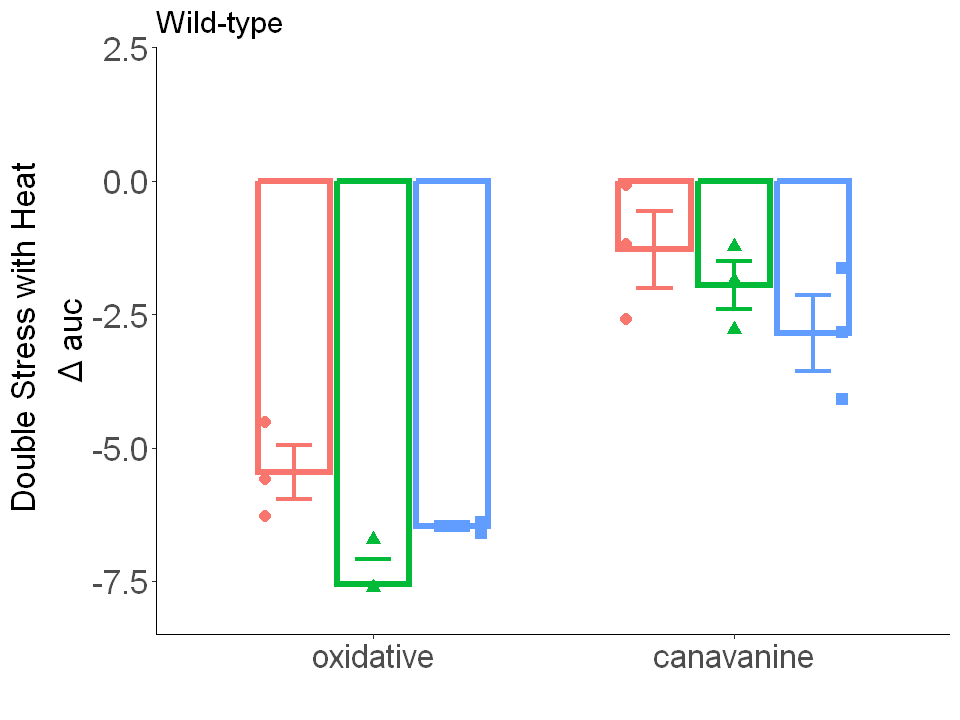

In [319]:
p6 <- ggplot(df1s, aes(x=stress, y=Ind, fill=condition)) + 
  geom_bar(aes(color=condition),fill="white",stat="identity",position=position_dodge(0.66),width=0.6,size=1.9) +
  geom_errorbar(data=df1s,aes(ymin=Ind-se, ymax=Ind+se,color=condition), width=.30,size=1.2,
                 position=position_dodge(.66))+geom_point(data=df, aes(stress, ci, group=condition,color=condition,shape=condition),size=3,position = position_dodge(width = 0.9), size=5, show.legend=FALSE)+  
#scale_y_continuous(breaks = seq(0, -10, -2.5)) +
labs(title="", x = "")+ylab(expression(atop( paste("Double Stress with Heat"),"\u394 auc")))+
   theme_classic() +ggtitle("Wild-type")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))+
theme(legend.title=element_blank())+
theme(legend.justification = "top")+theme(legend.position="bottom")+theme(plot.title = element_text(size=24))+theme(legend.text=element_text(size=24))+ylim(-8,2)
legend <- get_legend(p6)
p6 <- p6 +theme(legend.position="none")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))
p6
legend

In [265]:
## Double stress plot for dKJ

In [321]:
df <- read.table("2023-02-16-cpc237-medheat-doublestress_auc_data.tsv",header=TRUE)%>%filter(auc_fit!="NA")%>%filter(condition!="heat_control")
df$condition <- factor(df$condition,levels=unique(df$condition))
df$stress <- factor(df$stress,levels=c("oxidative","canavanine"))
df1s <- df%>%group_by(stress,condition)%>%summarise_at(vars(auc_fit), list(Ind = mean,se=std.error))
colnames(df)[colnames(df) == 'auc_fit'] <- 'ci'

Warning message:
"Duplicated aesthetics after name standardisation: size"
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


NULL

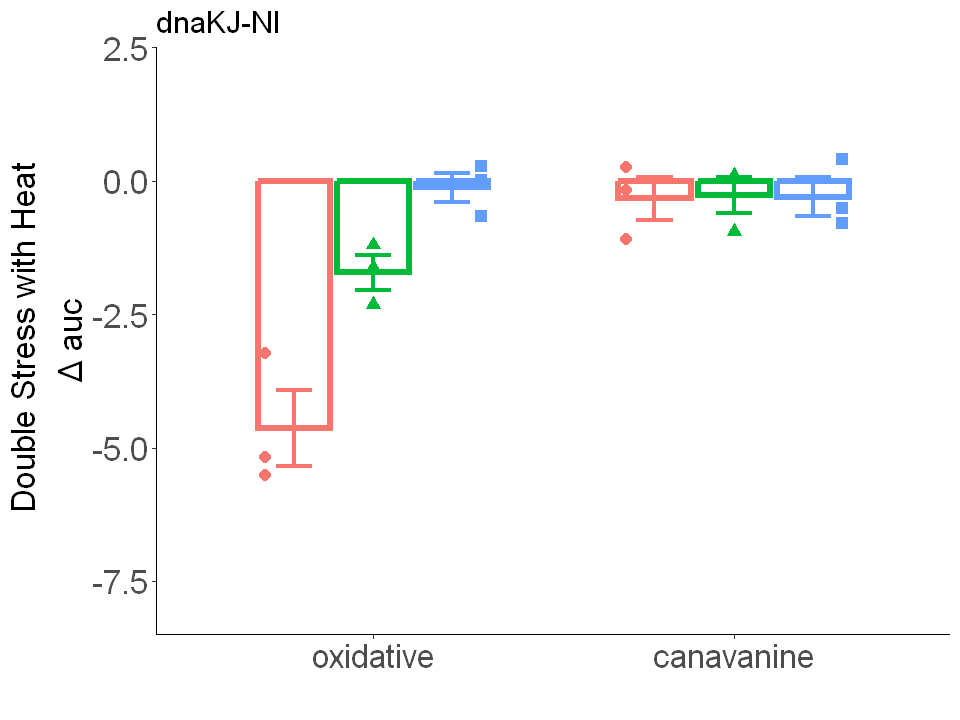

In [322]:
p7 <- ggplot(df1s, aes(x=stress, y=Ind, fill=condition)) + 
  geom_bar(aes(color=condition),fill="white",stat="identity",position=position_dodge(0.66),width=0.6,size=1.9) +
  geom_errorbar(data=df1s,aes(ymin=Ind-se, ymax=Ind+se,color=condition), width=.30,size=1.2,
                 position=position_dodge(.66))+geom_point(data=df, aes(stress, ci, group=condition,color=condition,shape=condition),size=3,position = position_dodge(width = 0.9), size=5, show.legend=FALSE)+  
#scale_y_continuous(breaks = seq(0, -10, -2.5)) +
labs(title="", x = "")+ylab(expression(atop( paste("Double Stress with Heat"),"\u394 auc")))+
   theme_classic() +ggtitle("dnaKJ-NI")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))+
theme(legend.title=element_blank())+
theme(legend.justification = "top")+theme(legend.position="bottom")+theme(plot.title = element_text(size=24))+theme(legend.text=element_text(size=24))+ylim(-8,2)
legend <- get_legend(p6)
p7 <- p7 +theme(legend.position="none")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))
p7
legend

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


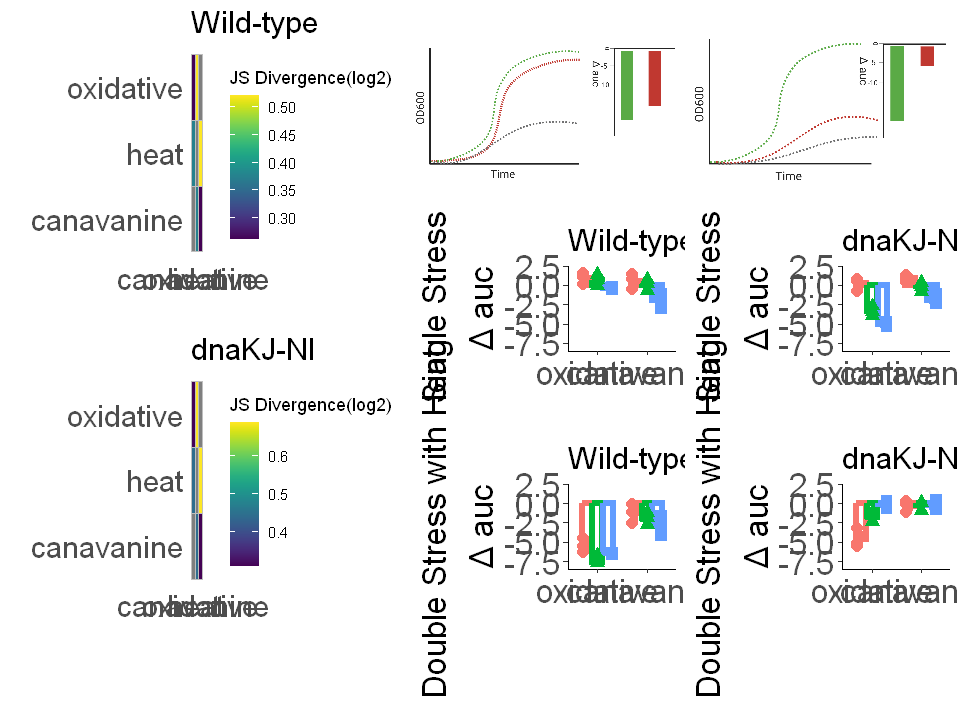

In [332]:
p <- grid.arrange(arrangeGrob(p1,p2),arrangeGrob(p3_1,p4,p6),arrangeGrob(p3_2,p5,p7),legend,ncol=3,nrow=2, widths=c(1.5,1,1),heights=c(1,0.1))

In [333]:
ggsave(filename = "../../../PNAS/FIGURES/Fig4_final.pdf",plot = p, width = 20,height = 15, dpi = 300, units = "in")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font metrics unknown for Unicode character U+0394"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Δ auc' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Δ auc' in 'mbcsToSbcs': dot substituted for <94>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font metrics unknown for Unicode character U+0394"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Δ auc' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Δ auc' in 'mbcsToSbcs': dot substituted for <94>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font metrics unknown for 